# Hackathon Project 🚀

---

## Problem Statement

Can we predict the type of drink based on the attribute of the drink? Since the data is imbalanced, I will be scoring based on the balanced accuracy score.

---

## EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
data = pd.read_csv('../data/caffeine.csv')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   drink          610 non-null    object 
 1   Volume (ml)    610 non-null    float64
 2   Calories       610 non-null    int64  
 3   Caffeine (mg)  610 non-null    int64  
 4   type           610 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 24.0+ KB


In [11]:
data.describe()

,Volume (ml),Calories,Caffeine (mg)
count,610.000000,610.000000,610.000000
mean,346.543630,75.527869,134.693443
std,143.747738,94.799919,155.362861
min,7.393375,0.000000,0.000000
25%,236.588000,0.000000,50.000000
50%,354.882000,25.000000,100.000000
75%,473.176000,140.000000,160.000000
max,1419.528000,830.000000,1555.000000


> Adding 'oz' column to compare volume easier

In [128]:
data['Volume (oz)'] = data['Volume (ml)'] * 0.033814

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   drink          610 non-null    object 
 1   Volume (ml)    610 non-null    float64
 2   Calories       610 non-null    int64  
 3   Caffeine (mg)  610 non-null    int64  
 4   type           610 non-null    object 
 5   Volume (oz)    610 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 28.7+ KB


In [18]:
data['type'].value_counts()

Energy Drinks    219
Coffee           173
Soft Drinks       90
Tea               66
Energy Shots      36
Water             26
Name: type, dtype: int64

### Exploring the types of beverages that are in the categories

#### Water

In [131]:
water = data[data['type']=='Water']
water.head()

,drink,Volume (ml),Calories,Caffeine (mg),type,Volume (oz)
584,Perrier Energize,250.19181,35,99,Water,8.459986
585,3 Water,499.79215,0,50,Water,16.899972
586,Heroec Energy Water,499.79215,0,60,Water,16.899972
587,Caribou BOUsted Sparkling Water,340.09525,0,75,Water,11.499981
588,Phocus Sparkling Water,340.09525,0,75,Water,11.499981


> The top 5 caffeinated 'waters'

In [132]:
water.sort_values(by='Caffeine (mg)', ascending=False).head()

,drink,Volume (ml),Calories,Caffeine (mg),type,Volume (oz)
598,Arti Sparkling Water,354.88200,0,120,Water,11.999980
607,Yerbae Sparkling Water,354.88200,0,100,Water,11.999980
602,GURU Sparkling Energy Water,354.88200,0,100,Water,11.999980
584,Perrier Energize,250.19181,35,99,Water,8.459986
587,Caribou BOUsted Sparkling Water,340.09525,0,75,Water,11.499981


> The top 5 high calorie 'waters'

In [133]:
water.sort_values(by='Calories', ascending=False).head()

,drink,Volume (ml),Calories,Caffeine (mg),type,Volume (oz)
608,Tonic Water,295.73500,110,0,Water,9.999983
591,VitaminWater Energy,591.47000,100,50,Water,19.999967
584,Perrier Energize,250.19181,35,99,Water,8.459986
589,Poland Spring Sparkling Energy Water,340.09525,35,75,Water,11.499981
594,Polar Frost Plus Energy,502.74950,10,67,Water,16.999972


#### Energy Shots

In [134]:
energy_shots = data[data['type']=='Energy Shots']
energy_shots.head()

,drink,Volume (ml),Calories,Caffeine (mg),type,Volume (oz)
392,Spike Energy Double Shot,125.983110,0,350,Energy Shots,4.259993
393,Zombie Blood Energy Potion,100.549900,25,80,Energy Shots,3.399994
394,Proper Wild Energy Shot,73.933750,25,180,Energy Shots,2.499996
395,Redline Max 300,73.933750,0,300,Energy Shots,2.499996
396,5 Hour Energy,57.076855,4,200,Energy Shots,1.929997


> The top 5 caffeinated 'energy shots'

In [135]:
energy_shots.sort_values(by='Caffeine (mg)', ascending=False).head()

,drink,Volume (ml),Calories,Caffeine (mg),type,Volume (oz)
392,Spike Energy Double Shot,125.98311,0,350,Energy Shots,4.259993
416,Neu Nootropic Shot,59.14700,0,350,Energy Shots,1.999997
408,Bang Shot,88.72050,0,300,Energy Shots,2.999995
395,Redline Max 300,73.93375,0,300,Energy Shots,2.499996
409,Redline Xtreme Shot,88.72050,5,300,Energy Shots,2.999995


> The top 5 high calorie 'energy shots'

In [136]:
energy_shots.sort_values(by='Calories', ascending=False).head()

,drink,Volume (ml),Calories,Caffeine (mg),type,Volume (oz)
404,Clif Shot Energy Gel,35.488200,100,100,Energy Shots,1.199998
412,Balance Active Shot,59.147000,80,100,Energy Shots,1.999997
413,Balance Energy Shot,59.147000,77,150,Energy Shots,1.999997
417,Nutramint Smart Serum,59.147000,45,200,Energy Shots,1.999997
405,Screamin Energy Max Hit,18.039835,40,185,Energy Shots,0.609999


#### Tea

In [137]:
tea = data[data['type']=='Tea']
tea.head()

,drink,Volume (ml),Calories,Caffeine (mg),type,Volume (oz)
518,PG Tips Black Tea,200.50833,0,50,Tea,6.779989
519,Sencha Green Tea Shot,189.27040,0,40,Tea,6.399989
520,Xingtea Iced Green Tea,694.97725,50,110,Tea,23.499961
521,Gold Peak Tea,547.10975,0,48,Tea,18.499969
522,Pure Leaf Iced Tea,547.10975,160,69,Tea,18.499969


> The top 5 caffeinated 'teas'

In [138]:
tea.sort_values(by='Caffeine (mg)', ascending=False).head()

,drink,Volume (ml),Calories,Caffeine (mg),type,Volume (oz)
528,Inko's White Tea Energy,458.38925,100,165,Tea,15.499974
542,Taiwanese Milk Tea,473.17600,299,151,Tea,15.999973
581,Zest Highly Caffeinated Tea,236.58800,0,150,Tea,7.999987
527,Guayaki Canned Yerba Mate,458.38925,120,150,Tea,15.499974
539,Guayaki Yerba Mate Bottled Tea,473.17600,80,140,Tea,15.999973


> The top 5 high calorie 'teas'

In [139]:
tea.sort_values(by='Calories', ascending=False).head()

,drink,Volume (ml),Calories,Caffeine (mg),type,Volume (oz)
542,Taiwanese Milk Tea,473.176,299,151,Tea,15.999973
531,Dunkin' Donuts Iced Tea,709.764,230,63,Tea,23.999960
550,Big Train Spiced Chai,236.588,210,65,Tea,7.999987
535,SoBe Green Tea,591.470,200,7,Tea,19.999967
536,Arizona Iced Tea,473.176,190,30,Tea,15.999973


#### Soft Drinks

In [140]:
soft_drinks = data[data['type']=='Soft Drinks']
soft_drinks.head()

,drink,Volume (ml),Calories,Caffeine (mg),type,Volume (oz)
428,Red Bull Simply Cola,250.19181,0,32,Soft Drinks,8.459986
429,Afri Cola,330.04026,139,83,Soft Drinks,11.159981
430,Fritz Kola (EU),330.04026,135,83,Soft Drinks,11.159981
431,Pepsi Max (UK),330.04026,0,43,Soft Drinks,11.159981
432,Premium Cola (EU),330.04026,132,83,Soft Drinks,11.159981


> The top 5 caffeinated 'soft drinks'

In [141]:
soft_drinks.sort_values(by='Caffeine (mg)', ascending=False).head()

,drink,Volume (ml),Calories,Caffeine (mg),type,Volume (oz)
434,Bawls,473.17600,190,102,Soft Drinks,15.999973
435,Mountain Dew Kickstart,473.17600,80,90,Soft Drinks,15.999973
430,Fritz Kola (EU),330.04026,135,83,Soft Drinks,11.159981
432,Premium Cola (EU),330.04026,132,83,Soft Drinks,11.159981
429,Afri Cola,330.04026,139,83,Soft Drinks,11.159981


> The top 5 high calorie 'soft drinks'

In [142]:
soft_drinks.sort_values(by='Calories', ascending=False).head()

,drink,Volume (ml),Calories,Caffeine (mg),type,Volume (oz)
433,Tropicana Twister Soda,591.470,320,0,Soft Drinks,19.999967
436,Sprecher Cherry Cola,473.176,240,0,Soft Drinks,15.999973
515,Boost Nutritional Drink,236.588,240,5,Soft Drinks,7.999987
434,Bawls,473.176,190,102,Soft Drinks,15.999973
478,Kickapoo Soda: Joy Juice & Fruit Shine,354.882,190,40,Soft Drinks,11.999980


#### Coffee

In [143]:
coffee = data[data['type']=='Coffee']
coffee.head()

,drink,Volume (ml),Calories,Caffeine (mg),type,Volume (oz)
0,Costa Coffee,256.993715,0,277,Coffee,8.689985
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee,8.459986
2,Hell Energy Coffee,250.191810,150,100,Coffee,8.459986
3,Killer Coffee (AU),250.191810,0,430,Coffee,8.459986
4,Nescafe Gold,250.191810,0,66,Coffee,8.459986


> The top 5 caffeinated 'coffees'

In [144]:
coffee.sort_values(by='Caffeine (mg)', ascending=False).head()

,drink,Volume (ml),Calories,Caffeine (mg),type,Volume (oz)
85,Black Label Brewed Coffee,354.882,0,1555,Coffee,11.99998
102,Very Strong Coffee,354.882,0,1350,Coffee,11.99998
92,Devils Brew Extreme Caffeine Coffee,354.882,0,1325,Coffee,11.99998
101,Taft Coffee (EU),354.882,0,1182,Coffee,11.99998
95,High Voltage Coffee (AU),354.882,0,1150,Coffee,11.99998


> The top 5 high calorie 'coffees'

In [145]:
coffee.sort_values(by='Calories', ascending=False).head()

,drink,Volume (ml),Calories,Caffeine (mg),type,Volume (oz)
37,Arby's Jamocha Shake,473.176000,830,12,Coffee,15.999973
30,Baskin Robbins Cappuccino Blast,709.764000,470,234,Coffee,23.999960
13,Dare Iced Coffee,500.087885,429,160,Coffee,16.909972
81,Big Train Java Chip Ice Coffee,354.882000,410,49,Coffee,11.999980
52,Peet's Caffe Mocha,473.176000,390,165,Coffee,15.999973


#### Energy Drinks

In [146]:
energy_drinks = data[data['type']=='Energy Drinks']
energy_drinks.head()

,drink,Volume (ml),Calories,Caffeine (mg),type,Volume (oz)
173,28 Black Energy Drink,250.19181,125,80,Energy Drinks,8.459986
174,4 Purpose Energy Drink,250.19181,70,70,Energy Drinks,8.459986
175,BEEBAD Energy Drink,250.19181,110,80,Energy Drinks,8.459986
176,Black Bruin Energy Drink,250.19181,122,38,Energy Drinks,8.459986
177,Blu Frog Energy Drink,250.19181,90,80,Energy Drinks,8.459986


> The top 5 caffeinated 'energy drinks'

In [147]:
energy_drinks.sort_values(by='Caffeine (mg)', ascending=False).head()

,drink,Volume (ml),Calories,Caffeine (mg),type,Volume (oz)
348,Hyde Xtreme,354.882,0,400,Energy Drinks,11.999980
334,BreinFuel,354.882,110,360,Energy Drinks,11.999980
314,Spike Hardcore Energy,473.176,0,350,Energy Drinks,15.999973
321,Wired X344 Energy Drink,473.176,220,344,Energy Drinks,15.999973
275,Loud Energy Drink,473.176,10,320,Energy Drinks,15.999973


> The top 5 high calorie 'energy drinks'

In [148]:
energy_drinks.sort_values(by='Calories', ascending=False).head()

,drink,Volume (ml),Calories,Caffeine (mg),type,Volume (oz)
242,Mega Monster Energy Drink,709.764,320,240,Energy Drinks,23.999960
297,Rockstar Boom,473.176,280,160,Energy Drinks,15.999973
301,Rockstar Punched,473.176,260,240,Energy Drinks,15.999973
273,Joker Mad Energy,473.176,260,160,Energy Drinks,15.999973
296,Rip It Energy Drink,473.176,260,160,Energy Drinks,15.999973


### Exploring all features

In [149]:
data.corr()

,Volume (ml),Calories,Caffeine (mg),Volume (oz)
Volume (ml),1.000000,0.341998,0.110770,1.000000
Calories,0.341998,1.000000,-0.126021,0.341998
Caffeine (mg),0.110770,-0.126021,1.000000,0.110770
Volume (oz),1.000000,0.341998,0.110770,1.000000


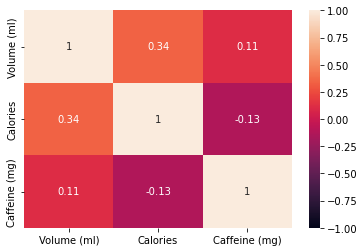

In [152]:
sns.heatmap(data.drop(columns='Volume (oz)').corr(), annot=True, vmin=-1);

- Nothing in the heatmap really stands out; there's a slight correlation with calories and volume but not very significant

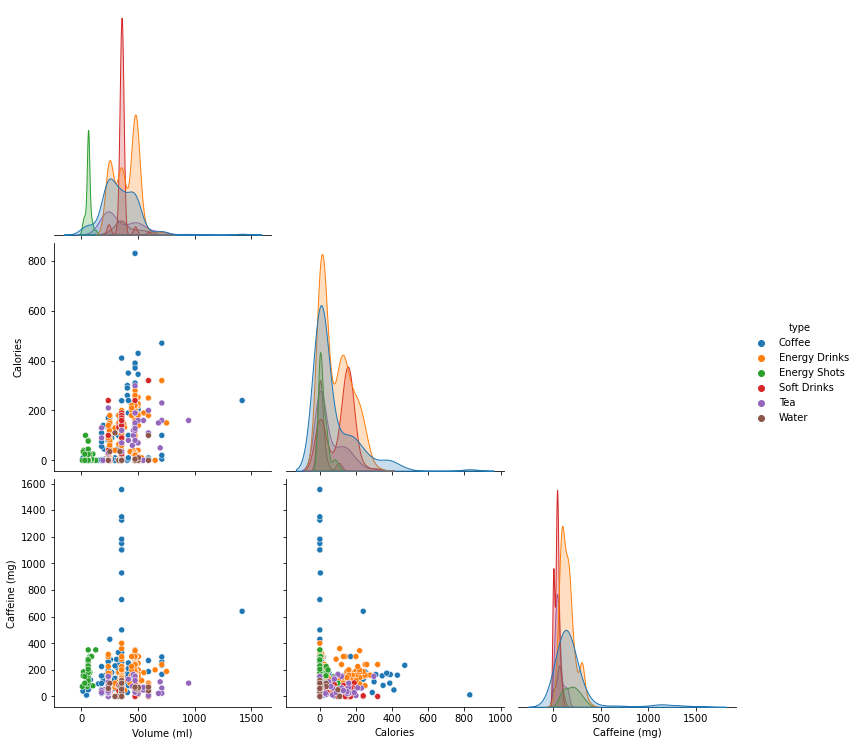

In [153]:
sns.pairplot(data.drop(columns='Volume (oz)'), hue='type', corner=True, height=3.5);

- The biggest piece of information I took in from this pairplot is that coffee drinks have the most outliers in each of these categories

##### The following kde plots are the same as in the pairplot, just larger. They are showing the distribution of the values in the specific columns based on the type of drink

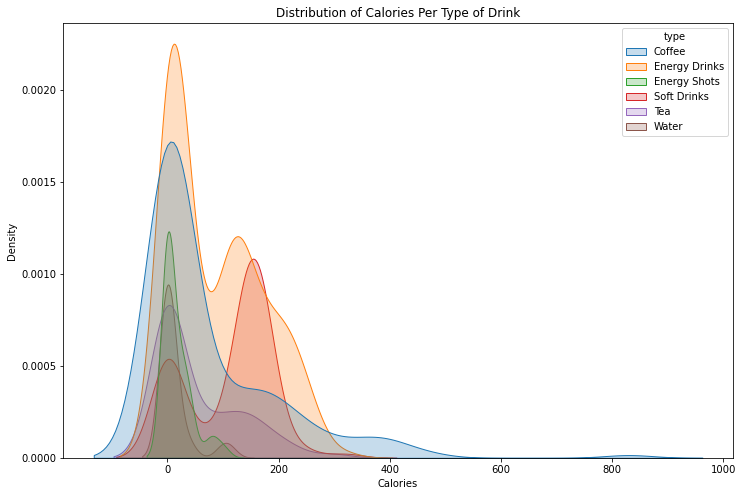

In [182]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=data, x='Calories', hue='type', multiple='layer', fill=True)
plt.title('Distribution of Calories Per Type of Drink');

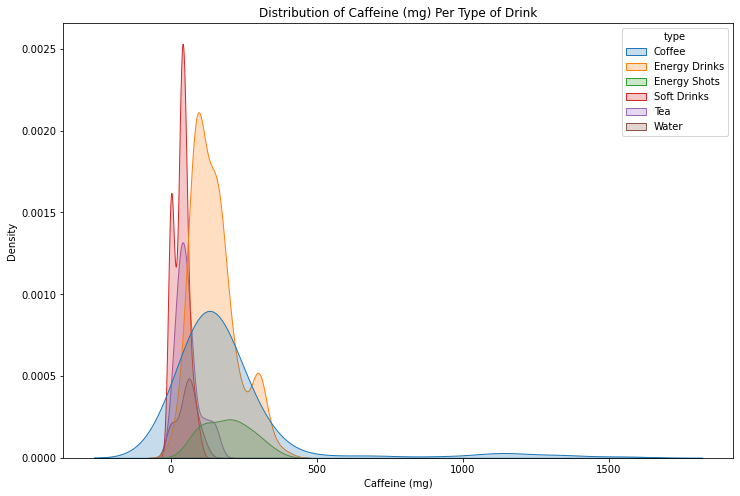

In [183]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=data, x='Caffeine (mg)', hue='type', multiple='layer', fill=True)
plt.title('Distribution of Caffeine (mg) Per Type of Drink');

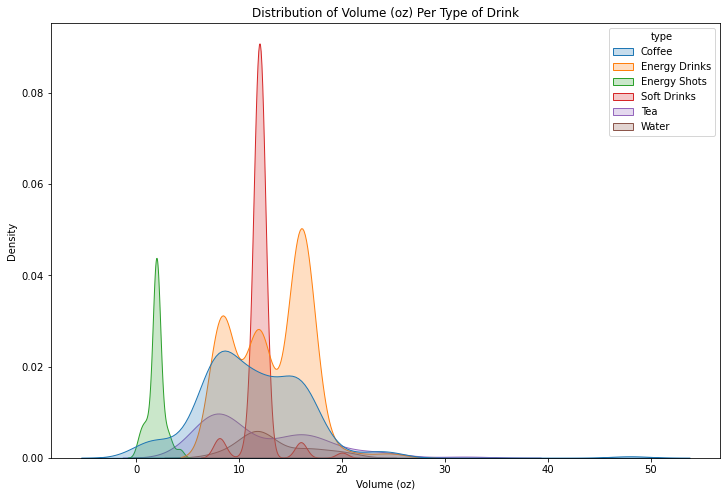

In [184]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=data, x='Volume (oz)', hue='type', multiple='layer', fill=True)
plt.title('Distribution of Volume (oz) Per Type of Drink');

### Exploring words in name of drink

In [161]:
cv = CountVectorizer()
drink_words = cv.fit_transform(data['drink'])

In [188]:
drink_words_df = pd.DataFrame(drink_words.A, columns=cv.get_feature_names_out())
drink_words_df = pd.concat([drink_words_df, data['type']], axis=1)
drink_words_df.head()

,10,150,18,1899,24,28,2x,300,3000,3d,...,yerbae,ymateina,zero,zest,zevia,zipfizz,zoa,zola,zombie,type
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Coffee
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Coffee
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Coffee
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Coffee
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Coffee


#### Top 10 words in drink name overall

In [190]:
drink_words_df.drop(columns='type').sum().sort_values(ascending=False).head(10)

energy       169
drink        112
coffee       107
tea           64
iced          33
shot          27
cola          27
brew          27
starbucks     27
water         24
dtype: int64

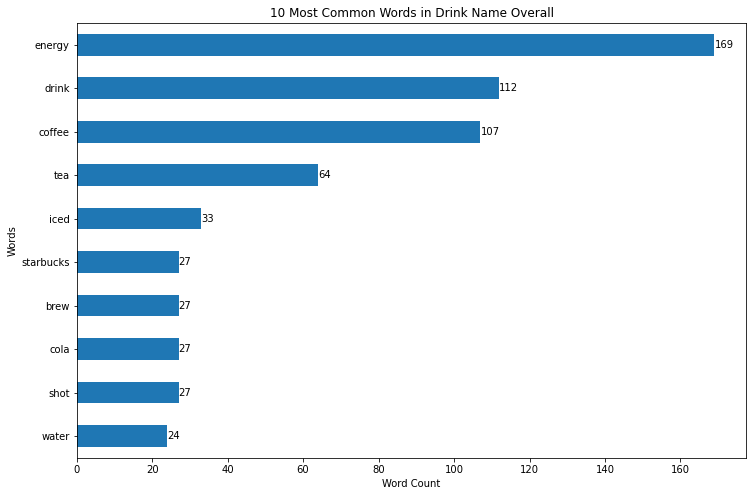

In [196]:
ax = drink_words_df.drop(columns='type').sum().sort_values(ascending=False).head(10).sort_values().plot.barh(
    figsize=(12,8), title='10 Most Common Words in Drink Name Overall', ylabel='Words'
)
ax.set_xlabel('Word Count')
ax.bar_label(ax.containers[0]);

In [207]:
drink_words_df['type'].value_counts()

Energy Drinks    219
Coffee           173
Soft Drinks       90
Tea               66
Energy Shots      36
Water             26
Name: type, dtype: int64

#### Top 10 words in 'coffee' drink name

In [270]:
coffee_words = drink_words_df[drink_words_df['type']=='Coffee']
coffee_words = coffee_words.drop(columns='type')
coffee_words.sum().sort_values(ascending=False).head(10)

coffee       103
starbucks     25
brew          23
cold          20
iced          17
brewed        11
latte         10
instant       10
peet          10
dunkin         9
dtype: int64

##### Adding percent column for better comparison across all types

In [281]:
coffee_words_df = pd.DataFrame(coffee_words.sum(), columns=['word_count'])
coffee_words_df = coffee_words_df[coffee_words_df['word_count']>0]
coffee_words_df['percent'] = ((coffee_words_df['word_count'] / 222) * 100).round(2)
coffee_words_df.sort_values(by='percent', ascending=False).head(10)

,word_count,percent
coffee,103,46.40
starbucks,25,11.26
brew,23,10.36
cold,20,9.01
iced,17,7.66
brewed,11,4.95
peet,10,4.50
latte,10,4.50
instant,10,4.50
dunkin,9,4.05


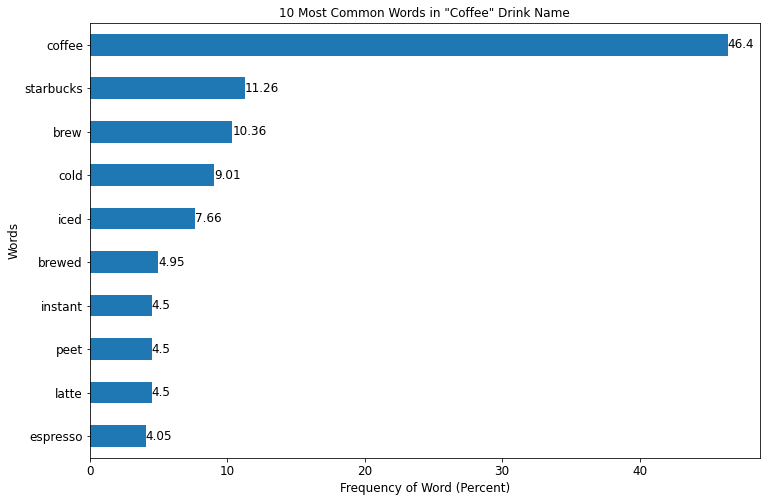

In [301]:
ax = coffee_words_df['percent'].sort_values().tail(10).plot.barh(
    figsize=(12,8), title='10 Most Common Words in "Coffee" Drink Name',fontsize=12
)
ax.set_xlabel('Frequency of Word (Percent)', fontsize=12)
ax.set_ylabel('Words', fontsize=12)
ax.bar_label(ax.containers[0], fontsize=12);

#### Top 10 words in 'energy drinks' drink name

In [247]:
energy_drinks_words = drink_words_df[drink_words_df['type']=='Energy Drinks']
energy_drinks_words = energy_drinks_words.drop(columns='type')
energy_drinks_words.sum().sort_values(ascending=False).head(10)

energy      134
drink       109
monster      20
mix          20
rockstar     12
uk           11
eu           11
red           7
zero          6
fuel          5
dtype: int64

In [305]:
energy_drinks_words_df = pd.DataFrame(energy_drinks_words.sum(), columns=['word_count'])
energy_drinks_words_df = energy_drinks_words_df[energy_drinks_words_df['word_count']>0]
energy_drinks_words_df['percent'] = ((energy_drinks_words_df['word_count'] / 315) * 100).round(2)
energy_drinks_words_df.sort_values(by='percent', ascending=False).head(10)

,word_count,percent
energy,134,42.54
drink,109,34.60
mix,20,6.35
monster,20,6.35
rockstar,12,3.81
eu,11,3.49
uk,11,3.49
red,7,2.22
zero,6,1.90
fuel,5,1.59


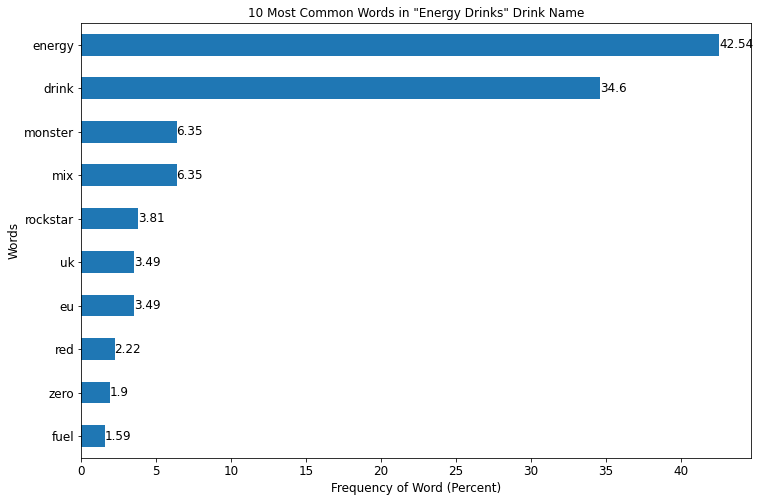

In [308]:
ax = energy_drinks_words_df['percent'].sort_values().tail(10).plot.barh(
    figsize=(12,8), title='10 Most Common Words in "Energy Drinks" Drink Name', fontsize=12
)
ax.set_xlabel('Frequency of Word (Percent)', fontsize=12)
ax.set_ylabel('Words', fontsize=12)
ax.bar_label(ax.containers[0], fontsize=12);

#### Top 10 words in 'soft drinks' drink name

In [251]:
soft_drinks_words = drink_words_df[drink_words_df['type']=='Soft Drinks']
soft_drinks_words = soft_drinks_words.drop(columns='type')
soft_drinks_words.sum().sort_values(ascending=False).head(10)

cola        24
soda        15
diet        11
mountain    10
coca         9
dew          9
pepsi        8
sugar        7
zero         6
root         5
dtype: int64

In [310]:
soft_drinks_words_df = pd.DataFrame(soft_drinks_words.sum(), columns=['word_count'])
soft_drinks_words_df = soft_drinks_words_df[soft_drinks_words_df['word_count']>0]
soft_drinks_words_df['percent'] = ((soft_drinks_words_df['word_count'] / 111) * 100).round(2)
soft_drinks_words_df.sort_values(by='percent', ascending=False).head(10)

,word_count,percent
cola,24,21.62
soda,15,13.51
diet,11,9.91
mountain,10,9.01
dew,9,8.11
coca,9,8.11
pepsi,8,7.21
sugar,7,6.31
zero,6,5.41
red,5,4.50


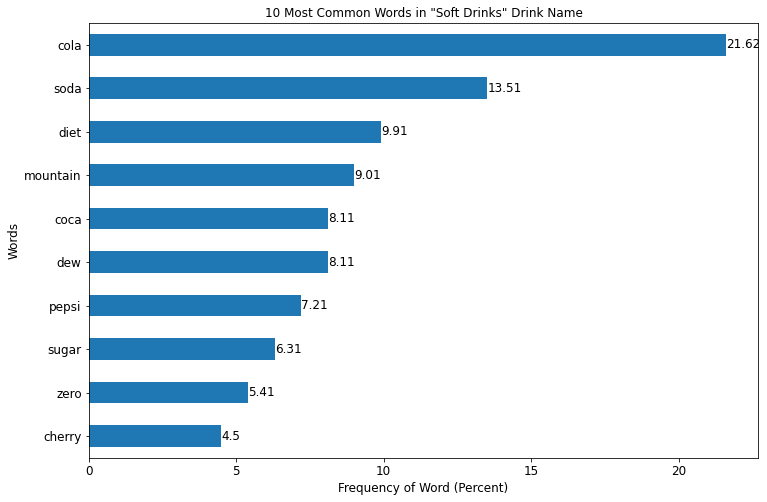

In [313]:
ax = soft_drinks_words_df['percent'].sort_values().tail(10).plot.barh(
    figsize=(12,8), title='10 Most Common Words in "Soft Drinks" Drink Name', fontsize=12
)
ax.set_xlabel('Frequency of Word (Percent)', fontsize=12)
ax.set_ylabel('Words', fontsize=12)
ax.bar_label(ax.containers[0], fontsize=12);

#### Top 10 words in 'tea' drink name

In [255]:
tea_words = drink_words_df[drink_words_df['type']=='Tea']
tea_words = tea_words.drop(columns='type')
tea_words.sum().sort_values(ascending=False).head(10)

tea         57
iced        16
green        5
chai         5
brew         4
mate         4
yerba        4
kombucha     4
lipton       3
black        3
dtype: int64

In [315]:
tea_words_df = pd.DataFrame(tea_words.sum(), columns=['word_count'])
tea_words_df = tea_words_df[tea_words_df['word_count']>0]
tea_words_df['percent'] = ((tea_words_df['word_count'] / 91) * 100).round(2)
tea_words_df.sort_values(by='percent', ascending=False).head(10)

,word_count,percent
tea,57,62.64
iced,16,17.58
chai,5,5.49
green,5,5.49
kombucha,4,4.40
yerba,4,4.40
brew,4,4.40
mate,4,4.40
black,3,3.30
lipton,3,3.30


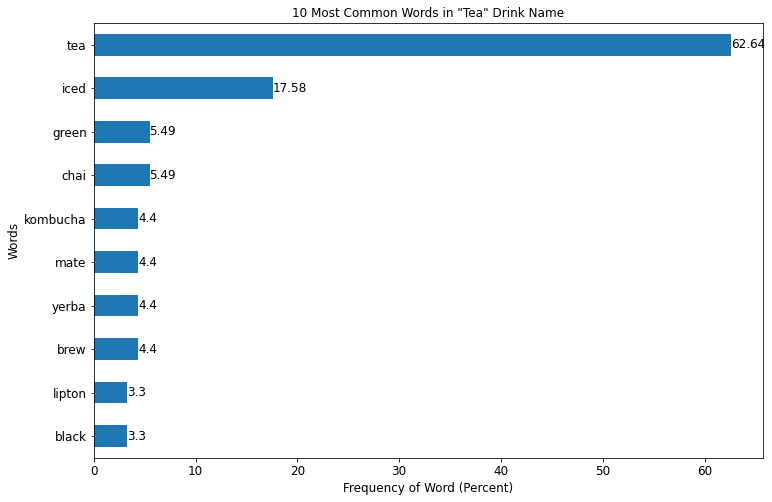

In [317]:
ax = tea_words_df['percent'].sort_values().tail(10).plot.barh(
    figsize=(12,8), title='10 Most Common Words in "Tea" Drink Name', fontsize=12
)
ax.set_xlabel('Frequency of Word (Percent)', fontsize=12)
ax.set_ylabel('Words', fontsize=12)
ax.bar_label(ax.containers[0], fontsize=12);

#### Top 10 words in 'energy shots' drink name

In [259]:
energy_shots_words = drink_words_df[drink_words_df['type']=='Energy Shots']
energy_shots_words = energy_shots_words.drop(columns='type')
energy_shots_words.sum().sort_values(ascending=False).head(10)

shot        23
energy      23
extra        4
strength     3
red          2
potion       2
max          2
balance      2
thunder      2
hour         2
dtype: int64

In [320]:
energy_shots_words_df = pd.DataFrame(energy_shots_words.sum(), columns=['word_count'])
energy_shots_words_df = energy_shots_words_df[energy_shots_words_df['word_count']>0]
energy_shots_words_df['percent'] = ((energy_shots_words_df['word_count'] / 62) * 100).round(2)
energy_shots_words_df.sort_values(by='percent', ascending=False).head(10)

,word_count,percent
energy,23,37.10
shot,23,37.10
extra,4,6.45
strength,3,4.84
red,2,3.23
hour,2,3.23
eternal,2,3.23
thunder,2,3.23
redline,2,3.23
caffeine,2,3.23


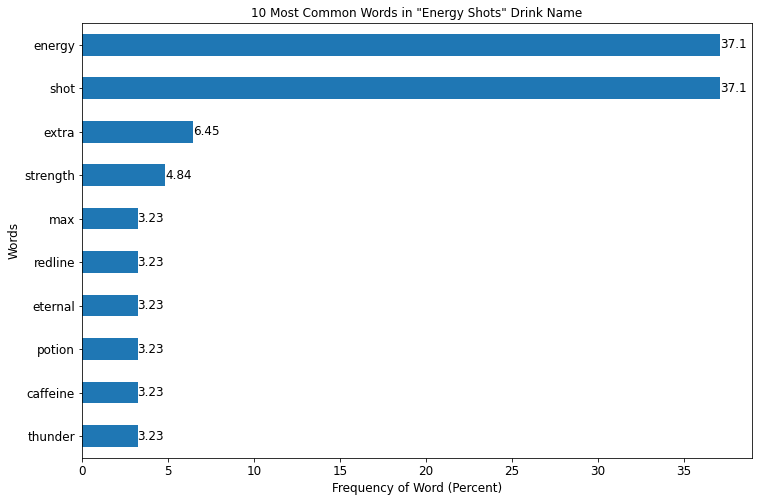

In [322]:
ax = energy_shots_words_df['percent'].sort_values().tail(10).plot.barh(
    figsize=(12,8), title='10 Most Common Words in "Energy Shots" Drink Name', fontsize=12
)
ax.set_xlabel('Frequency of Word (Percent)', fontsize=12)
ax.set_ylabel('Words', fontsize=12)
ax.bar_label(ax.containers[0], fontsize=12);

#### Top 10 words in 'water' drink name

In [263]:
water_words = drink_words_df[drink_words_df['type']=='Water']
water_words = water_words.drop(columns='type')
water_words.sum().sort_values(ascending=False).head(10)

water        22
sparkling    15
energy        6
polar         2
perrier       2
bubly         2
caffeine      2
poland        1
plus          1
spring        1
dtype: int64

In [325]:
water_words_df = pd.DataFrame(water_words.sum(), columns=['word_count'])
water_words_df = water_words_df[water_words_df['word_count']>0]
water_words_df['percent'] = ((water_words_df['word_count'] / 39) * 100).round(2)
water_words_df.sort_values(by='percent', ascending=False).head(10)

,word_count,percent
water,22,56.41
sparkling,15,38.46
energy,6,15.38
perrier,2,5.13
bubly,2,5.13
caffeine,2,5.13
polar,2,5.13
pep,1,2.56
phocus,1,2.56
plus,1,2.56


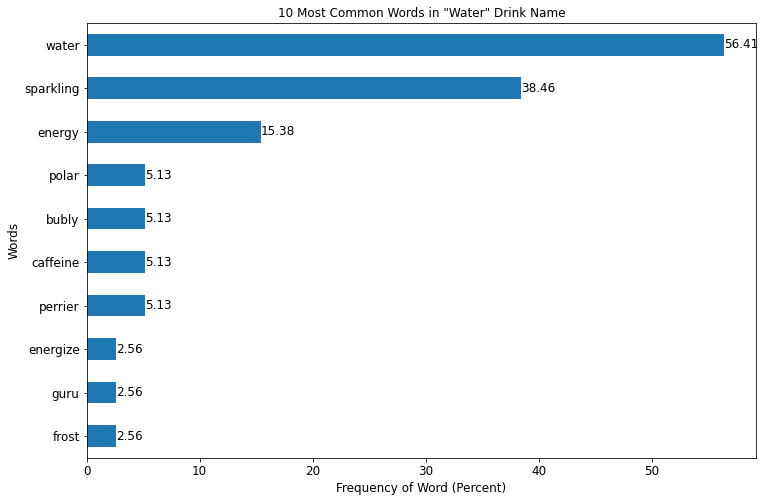

In [327]:
ax = water_words_df['percent'].sort_values().tail(10).plot.barh(
    figsize=(12,8), title='10 Most Common Words in "Water" Drink Name', fontsize=12
)
ax.set_xlabel('Frequency of Word (Percent)', fontsize=12)
ax.set_ylabel('Words', fontsize=12)
ax.bar_label(ax.containers[0], fontsize=12);

> Unsurprisingly, the top word in each 'type' category (other than soft drinks) is in the beverage type name